# HILBERT VIBRATION DECOMPOSITION

## Drive access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/ML_Seizure_Project"

DL_Pipeline  HilbertOutput  InputImageForStacking  RawData


In [ ]:
pip install --upgrade mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 50.0 MB/s eta 0:00:00


In [ ]:
pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.8 MB/s eta 0:00:00


## Hilbert For both .edf end .fif files

## HVD and Segmentation

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.signal import hilbert
import mne

input_file = "/content/drive/My Drive/ML_Seizure_Project/RawData/p034.edf"
output_folder = "/content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/"
os.makedirs(output_folder, exist_ok=True)

if input_file.endswith('.fif'):
  raw = mne.io.read_raw_fif(input_file, preload=True)
elif input_file.endswith('.edf'):
  raw = mne.io.read_raw_edf(input_file, preload=True)
else:
  raise ValueError(f"Unsupported file format: {input_file}")

data, times = raw[:, :]

frequency_bands = [(0.5, 4), (4, 8), (8, 13), (13, 30), (30, 50)]

hvd_subcomponents = []

for i, (lowcut, highcut) in enumerate(frequency_bands):

    raw_bandpass = raw.copy().filter(lowcut, highcut, fir_design='firwin')

    data_bandpass, times_bandpass = raw_bandpass[:, :]
    hilbert_transformed = hilbert(data_bandpass)

    envelope = np.abs(hilbert_transformed)
    hvd_subcomponents.append(envelope)

    df = pd.DataFrame(envelope.T, index=times_bandpass, columns=raw_bandpass.ch_names)

    filename = f'sub_{i}.csv'

    file_path = os.path.join(output_folder, filename)

    df.to_csv(file_path, index=True)

    print(f"Saved sub {i} to {file_path}")

Extracting EDF parameters from /content/drive/My Drive/ML_Seizure_Project/RawData/p034.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-6-33b40fc0183e>:14: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(input_file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Saved sub 0 to /content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/sub_0.csv
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Saved sub 1 to /content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/sub_1.csv
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Saved sub 2 to /content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/sub_2.csv
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Saved sub 3 to /content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/sub_3.csv
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 113 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Saved sub 4 to /content/drive/My Drive/ML_Seizure_Project/HilbertOutput/p034seizure/sub_4.csv


## HVD Graph plotting

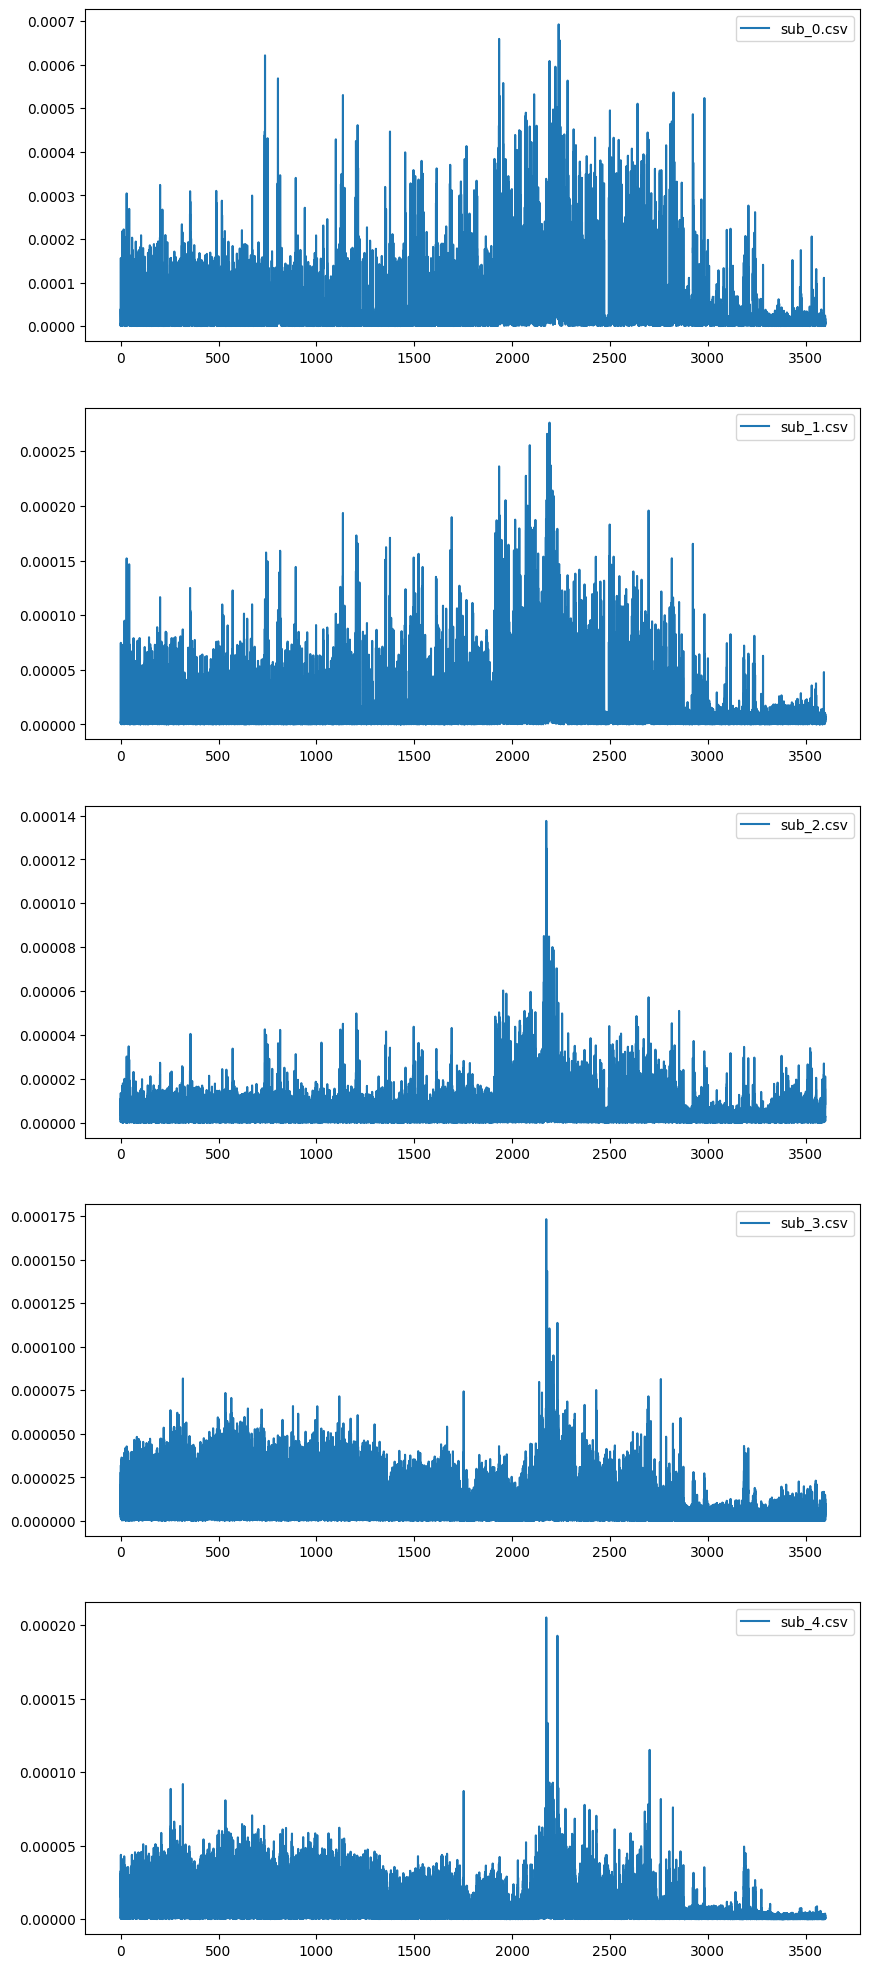

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(os.listdir(output_folder)), 1, figsize=(10, 5 * len(os.listdir(output_folder))))

for i, filename in enumerate(os.listdir(output_folder)):
    if filename.endswith(".csv"):
        file_path = os.path.join(output_folder, filename)
        df = pd.read_csv(file_path, index_col=0)

        axs[i].plot(df.index, df.iloc[:, 0], label=filename)
        axs[i].legend()

plt.show()

print(type(df))